### Business Understanding
prediksi "harga" properti di kota bandung, menggunakan ML berdasarkan parameter jumlah kamar, Luas Bangunan, Luas Lahan.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('properti_bdg.csv')
df

,judul,alamat,deskripsi,kamar,bangunan,lahan,harga
0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000
1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000
2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000
3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000
4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000
...,...,...,...,...,...,...,...
1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000
1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000
1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000
1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000


### Data Understanding
- Data diatas merupakan data properti di daerah Bandung
<br>
- Objective goals: memprediksi harga
<br>
- Harga memiliki type data numeric. maka dari itu tim Data propose metode Linear Regression
<br>
- Kenapa Regresi? dimana variable x: ['kamar', 'bangunan', 'lahan'], y = [harga]
<br>
- Rumus regresi:
Y = b + m1.x1 + m2.x2 + ... + mn.xn
<br>
mn = koefisien regresi / rata2 perubahan y, jika x bertambah
<br>
b = intercept / Nilai pada saat x = 0.

In [3]:
df.shape

(1470, 7)

- Terdapat 1470 data observasi dan 7 fitur
- hapus fitur yang tidak relevan: ['alamat', 'deskripsi', 'judul']

In [4]:
# hapus feature yang tidak relevan
df.drop(columns=['alamat', 'deskripsi', 'judul'], inplace=True)
df

,kamar,bangunan,lahan,harga
0,3,75,84,590000000
1,3,70,71,700000000
2,2,36,72,386000000
3,2,60,60,499000000
4,2,90,114,397500000
...,...,...,...,...
1465,6,280,240,2800000000
1466,3,180,90,1000000000
1467,2,65,72,572000000
1468,6,160,318,2300000000


In [5]:
df.info()
print("")
print("cek null values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kamar     1470 non-null   int64
 1   bangunan  1470 non-null   int64
 2   lahan     1470 non-null   int64
 3   harga     1470 non-null   int64
dtypes: int64(4)
memory usage: 46.1 KB

cek null values


kamar       0
bangunan    0
lahan       0
harga       0
dtype: int64

tidak data null

In [6]:
df.describe()

,kamar,bangunan,lahan,harga
count,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,3.646259,177.489116,210.235374,2.581586e+09
std,2.535528,176.726326,500.109095,4.358051e+09
min,0.000000,0.000000,0.000000,6.500000e+07
25%,2.000000,65.000000,80.000000,6.750000e+08
50%,3.000000,122.500000,120.000000,1.370000e+09
75%,4.000000,230.000000,210.000000,3.000000e+09
max,47.000000,1850.000000,15000.000000,5.700000e+10


Terdapat data anomali dari fitur kamar., terdapat kamar dengan jumlah 47. selanjutnya bisa kita validasi di proses EDA

### Exploratory Data Analysis

### Univariate Analysis

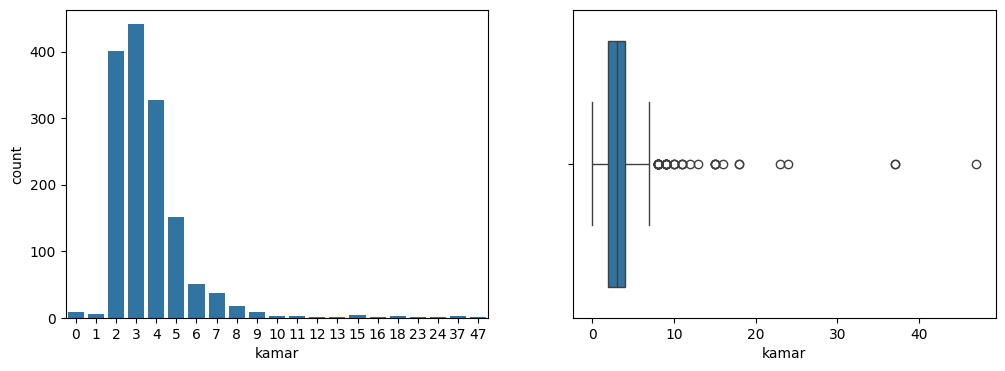

In [7]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df['kamar'])

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['kamar'])
plt.show()

terdapat outlier di data fitur kamar

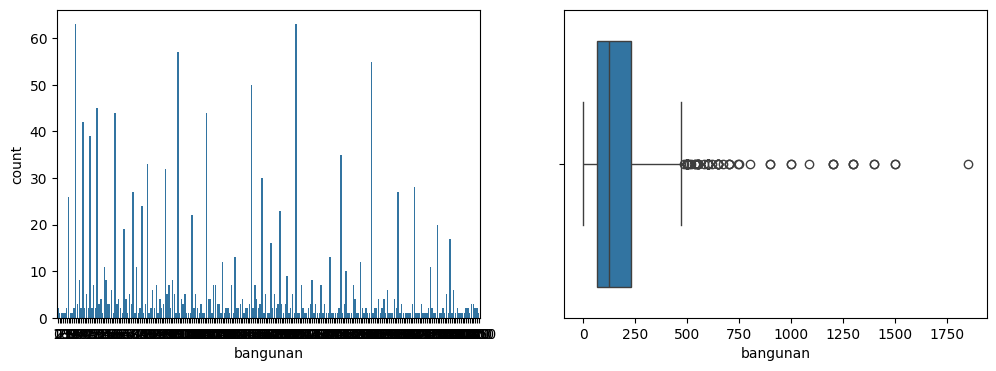

In [8]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df['bangunan'])

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['bangunan'])
plt.show()

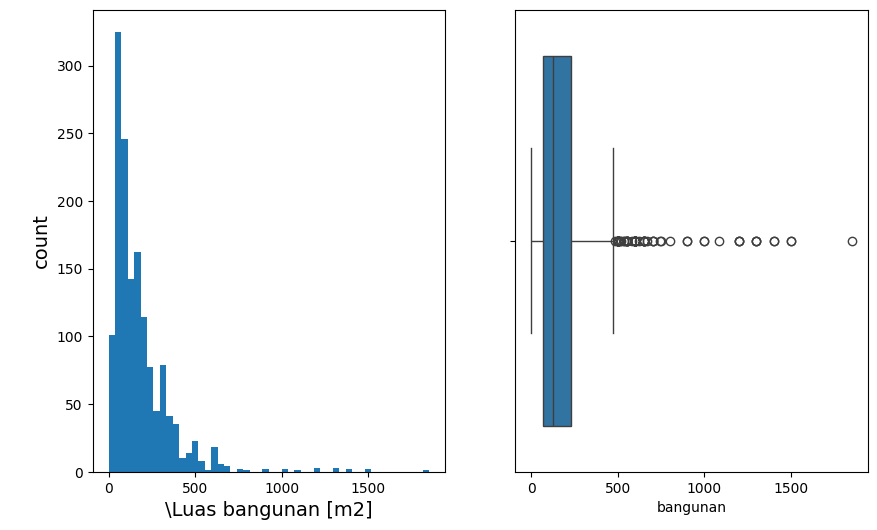

In [9]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
df['bangunan'].plot(kind='hist', figsize=(10, 6), bins=50)
plt.ylabel('\ncount', size=14)
plt.xlabel('\Luas bangunan [m2]', size=14)

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['bangunan'])
plt.show()

terdapat outlier dari fitur luas bangunan

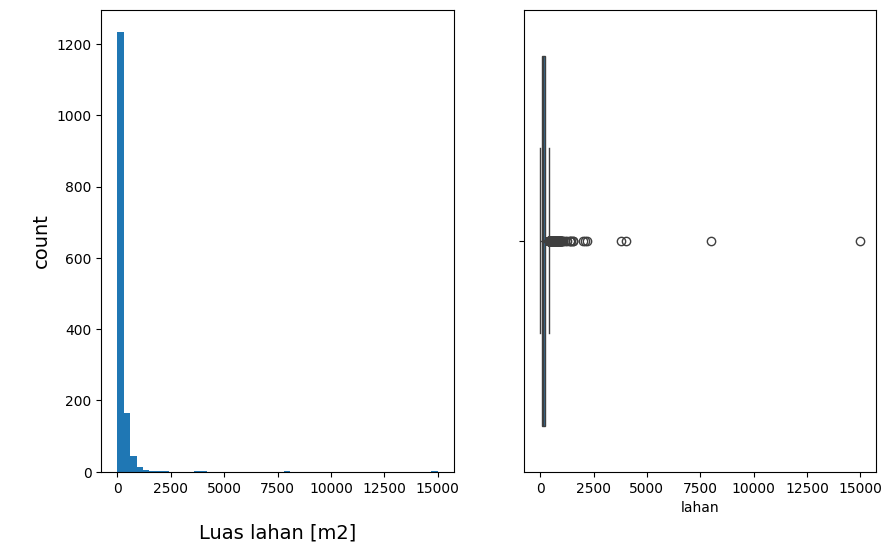

In [10]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
df['lahan'].plot(kind='hist', figsize=(10, 6), bins=50)
plt.ylabel('\ncount', size=14)
plt.xlabel('\nLuas lahan [m2]', size=14)

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['lahan'])
plt.show()

terdapat outliers di fitur luas lahan

In [11]:
df['kamar'].unique()

array([ 3,  2,  7,  4, 13,  6,  5,  9,  8, 23,  1, 12, 15, 11, 10, 18,  0,
       24, 37, 16, 47], dtype=int64)

In [12]:
df['lahan'].unique()

array([   84,    71,    72,    60,   114,    80,   620,   276,   100,
         120,    35,    70,    50,    78,    69,   125,   110,   421,
          40,    65,    47,   342,    55,   260,   160,   254,    81,
          90,    92,    59,   150,    62,    36,   381,    37,    63,
         167,   148,   193,    66,   118,   126,    56,    41,   177,
         344,   278,     0,   215,   179,   264,   500,    83,   155,
          91,   320,   290,   300,   127,   128,   189,   102,   105,
         385,   112,   158,    96,    54,   130,   830,    34,   154,
         226,    88,    97,   450,    98,    45,   360,   190,   144,
          75,   380,   642,   255,  1170,    43,    57,   119,    95,
         140,    89,   267,    61,   108,   200,   210,   319,   223,
         233,   240,   212,   414,   411,    30,   161,   288,   152,
         136,   375,   861,   543,   180,   420,   204,   350,   170,
         477,   172,   588,    67,   207,   117,   387,   230,   262,
         187,   197,

In [13]:
df['bangunan'].unique()

array([  75,   70,   36,   60,   90,   48,  200,  350,   30,  670,  100,
         65,   37,   21,   80,   45,   49,   40,   50,  140,  150,  450,
        170,   55,   73,   61,  315,  120,  110,   83,  250,   56,   38,
         77,   58,   68,  240,   98,  324,  101,  300,   86,  230,  320,
         34,  212,   43,  650,  135,   94,   54,   72,  260,  196,  180,
        123, 1085,   42,  124,   27,  400,  800,  115,  149,  241,   52,
         29,  126,  128,  160, 1500,   35,  125,   88,   74,   62,  235,
         78,  130,  147,  185,  470,  210,  411,  122,  340,  155,   39,
        600,  227,  276,  280,  141,  144,  348,   96,  175,  220,   85,
        129,  440,  190,  255,  237,  270,  127,  380,  376,  106,  159,
         69,  550,  167,  422,   53,  330,  156,  142,  177,  133,   87,
        290,  500,  214,  215,  269,  516,  213,  102,  114,  116,  171,
        317,  197,   81,  750,  323,   51,  145,  248,  325,  154,  420,
         89,  294,  216,  132,   47,  192,  136,  2

In [14]:
## masking
mask_kamar = df['kamar'] < 5
mask_LT = df['lahan'] < 1000
mask_LB = df['bangunan'] < 1000

# tampung di variable baru
df = df[mask_kamar & mask_LT & mask_LB]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kamar     1173 non-null   int64
 1   bangunan  1173 non-null   int64
 2   lahan     1173 non-null   int64
 3   harga     1173 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


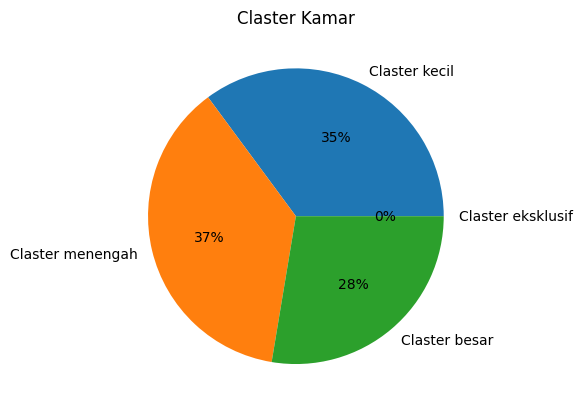

In [15]:
# Pie chart
min_kamar = df['kamar'].min()
max_kamar = df['kamar'].max()

q = df['kamar'].quantile([.25, .5, .75])

kmr_kcl = df.loc[df['kamar'] <= q[0.25]]
kmr_mng = df.loc[(df['kamar'] > q[0.25]) & (df['kamar'] <= q[0.5])]
kmr_bsr = df.loc[(df['kamar'] > q[0.5]) & (df['kamar'] <= q[0.75])]
kmr_eks = df.loc[df['kamar'] > q[0.75]]


plt.pie([len(kmr_kcl), len(kmr_mng), len(kmr_bsr), len(kmr_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster eksklusif"],
        autopct="%0.f%%")
plt.title("Claster Kamar")
plt.show()

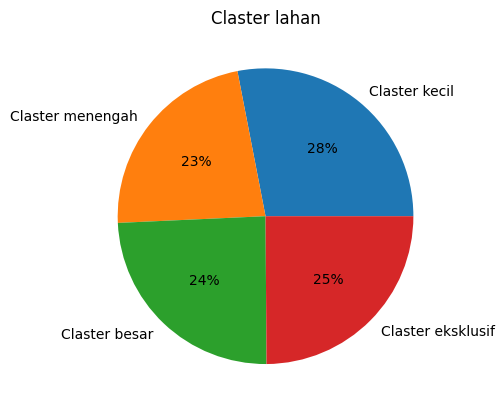

In [16]:
# Pie chart
min_kamar = df['lahan'].min()
max_kamar = df['lahan'].max()

q = df['lahan'].quantile([.25, .5, .75])

kmr_kcl = df.loc[df['lahan'] <= q[0.25]]
kmr_mng = df.loc[(df['lahan'] > q[0.25]) & (df['lahan'] <= q[0.5])]
kmr_bsr = df.loc[(df['lahan'] > q[0.5]) & (df['lahan'] <= q[0.75])]
kmr_eks = df.loc[df['lahan'] > q[0.75]]


plt.pie([len(kmr_kcl), len(kmr_mng), len(kmr_bsr), len(kmr_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster eksklusif"],
        autopct="%0.f%%")
plt.title("Claster lahan")
plt.show()

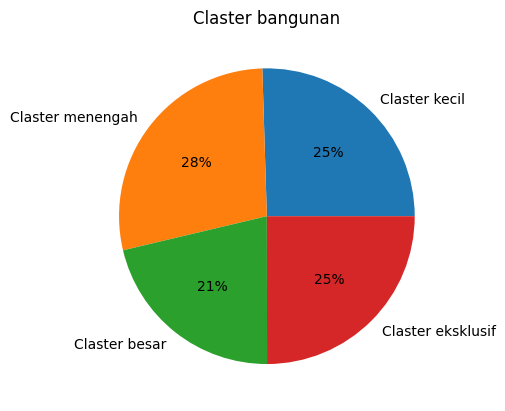

In [17]:
# Pie chart
min_kamar = df['bangunan'].min()
max_kamar = df['bangunan'].max()

q = df['bangunan'].quantile([.25, .5, .75])

kmr_kcl = df.loc[df['bangunan'] <= q[0.25]]
kmr_mng = df.loc[(df['bangunan'] > q[0.25]) & (df['bangunan'] <= q[0.5])]
kmr_bsr = df.loc[(df['bangunan'] > q[0.5]) & (df['bangunan'] <= q[0.75])]
kmr_eks = df.loc[df['bangunan'] > q[0.75]]


plt.pie([len(kmr_kcl), len(kmr_mng), len(kmr_bsr), len(kmr_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster eksklusif"],
        autopct="%0.f%%")
plt.title("Claster bangunan")
plt.show()

jelasin sebaran data hasil univariate analysis

In [18]:
df.corr().style.background_gradient().format(precision=2)

,kamar,bangunan,lahan,harga
kamar,1.00,0.54,0.41,0.25
bangunan,0.54,1.00,0.75,0.64
lahan,0.41,0.75,1.00,0.76
harga,0.25,0.64,0.76,1.00


jelasin multivariate analysis

### modeling

In [19]:
df

,kamar,bangunan,lahan,harga
0,3,75,84,590000000
1,3,70,71,700000000
2,2,36,72,386000000
3,2,60,60,499000000
4,2,90,114,397500000
...,...,...,...,...
1461,3,100,72,980000000
1462,3,164,270,3200000000
1463,4,105,80,991000000
1466,3,180,90,1000000000


In [20]:
# tentukan variable dependen dan independen
x = df.drop(columns='harga')
y = df['harga']

# x_trial = x[:21]
# y_trial = y[:21]

# split data 80% - 20%
# opsi 2: 70% - 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# assign model RL
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
# x_train.to_csv('x_train.csv', index=False)
# x_test.to_csv('x_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

In [21]:
df = df.groupby('harga')
df.first()

,kamar,bangunan,lahan
harga,,,
65000000,2,21,35
100000000,2,30,40
115000000,2,36,60
130000000,2,30,50
135000000,2,36,48
...,...,...,...
22000000000,4,177,679
34000000000,0,500,850
38000000000,4,600,800


In [22]:
# buat evaluasi model
y_pred = lin_reg.predict(x_test)
lin_reg.score(x_test, y_test)

0.7317353135318807

In [23]:
# solve business problem
input_data = pd.DataFrame({'kamar': [2], 
                           'bangunan': [109], 
                           'lahan': [83]})

# pakai model buat prediksi dari input POST
predict = lin_reg.predict(input_data)
predict = round(float(predict[0]), 2)

predict = "{:,}".format(predict)
print("Rp.", predict)

Rp. 1,136,935,058.0


# use case 2

In [26]:
# tentukan variable dependen dan independen

df2 = pd.read_csv('properti_bdg.csv')

x = df2[['harga']]
y = df2[['kamar', 'bangunan', 'lahan']]

# split data 80% - 20%
# opsi 2: 70% - 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# assign model RL
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
import locale

harga_min = df2['harga'].min()

harga_to_predict = 100000000

# ubah format jadi rupiah
locale.setlocale(locale.LC_ALL, 'id_ID')
harga_formated = locale.currency(harga_to_predict, grouping=True)

if harga_to_predict < harga_min:
    print(f"Harga yang dimasukan ({harga_formated}) terlalu kecil. Sistem tidak bisa memberikan rekomendasi spesifikasi properti yang diinginkan")

else:
    df_input = pd.DataFrame({'harga': [harga_to_predict]})
    predict_features = lin_reg.predict(df_input)

    hasil_prediksi = {y.columns[i]: round((predict_features[0][i])) for i in range (len(y.columns))}
    print(f"Spesifikasi rumah dengan harga {harga_formated}:")
    print(hasil_prediksi)

Spesifikasi rumah dengan harga Rp100.000.000,00:
{'kamar': 3, 'bangunan': 114, 'lahan': 90}
